In [1]:
%matplotlib inline

In [2]:
import matplotlib
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras import callbacks
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from pyimagesearch.smallervggnet import SmallerVGGNet
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os
from PIL import Image
from osgeo import gdal
import livelossplot
from sklearn.metrics import confusion_matrix
import pandas as pd
from pandas_ml import ConfusionMatrix
import seaborn as sns
import sklearn.metrics as metrics
from keras.models import load_model

D:\Anaconda\envs\tcc\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
dataset = "clippedcrop"
modelName = "cropsNet.model"
nameLabel = "CropsLabels.pickle"

In [4]:
EPOCHS = 100
INIT_LR = 1e-3
BS = 8
IMAGE_DIMS = (7, 55, 55)

In [5]:
data = []
labels = []

In [6]:
imagePaths = sorted(list(paths.list_images(dataset)))
random.seed(42)
random.shuffle(imagePaths)

In [7]:
count = 0
for imagePath in imagePaths:
    print(imagePath)
    raster = gdal.Open(imagePath)
    arr = raster.ReadAsArray()
    [bands,cols,rows] = arr.shape
    count += 1
    data.append(arr)
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

clippedcrop\Corn\corn2.tif
clippedcrop\Orange\orange2.tif
clippedcrop\Orange\orange24.tif
clippedcrop\Sugarcane\sugarcane4.tif
clippedcrop\Sugarcane\sugarcane15.tif
clippedcrop\Sugarcane\sugarcane18.tif
clippedcrop\Orange\orange33.tif
clippedcrop\Orange\orange32.tif
clippedcrop\Orange\orange38.tif
clippedcrop\Soybean\soybean3.tif
clippedcrop\Soybean\soybean8.tif
clippedcrop\Soybean\soybean10.tif
clippedcrop\Orange\orange34.tif
clippedcrop\Orange\orange13.tif
clippedcrop\Sugarcane\sugarcane14.tif
clippedcrop\Sugarcane\sugarcane19.tif
clippedcrop\Orange\orange11.tif
clippedcrop\Soybean\soybean9.tif
clippedcrop\Sugarcane\sugarcane25.tif
clippedcrop\Orange\orange55.tif
clippedcrop\Orange\orange40.tif
clippedcrop\Orange\orange6.tif
clippedcrop\Soybean\soybean2.tif
clippedcrop\Orange\orange8.tif
clippedcrop\Sugarcane\sugarcane22.tif
clippedcrop\Sugarcane\sugarcane11.tif
clippedcrop\Orange\orange7.tif
clippedcrop\Soybean\soybean11.tif
clippedcrop\Orange\orange21.tif
clippedcrop\Sugarcane\suga

In [8]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("[INFO] data matrix: {:.2f}MB".format(
	data.nbytes / (1024 * 1000.0)))

lb = LabelBinarizer()
labels = lb.fit_transform(labels)


[INFO] data matrix: 22.17MB


In [9]:
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.3, random_state=42)


aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="reflect")

In [10]:
model = SmallerVGGNet.build(width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],
	depth=IMAGE_DIMS[2], classes=len(lb.classes_))
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
compile1 = model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=['accuracy'])

Passou aqui1
Passou aqui2
Passou aqui3
Passou aqui4
Passou aqui5
Passou aqui6


In [11]:
f = open(nameLabel, "wb")
f.write(pickle.dumps(lb))
f.close()

In [12]:
check_p = callbacks.ModelCheckpoint(filepath='cropclassifier_cnn_{val_acc:.2f}.model',
                                    monitor='val_acc', verbose=1,
                                    save_best_only=True, save_weights_only=False)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.95, patience=3,
                                        verbose=1, cooldown=2)
callb_l = [check_p, reduce_lr]

plot_losses = livelossplot.PlotLossesKeras()

In [13]:
model.fit_generator(
	aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY),
	steps_per_epoch=len(trainX) // BS,
    callbacks = callb_l,
	epochs=EPOCHS, verbose=0)

D:\Anaconda\envs\tcc\lib\site-packages\keras_preprocessing\image.py:1437: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (93, 7, 55, 55) (55 channels).
  str(self.x.shape[channels_axis]) + ' channels).')



Epoch 00001: val_acc improved from -inf to 0.75610, saving model to cropclassifier_cnn_0.76.model

Epoch 00002: val_acc did not improve from 0.75610

Epoch 00003: val_acc did not improve from 0.75610

Epoch 00004: val_acc did not improve from 0.75610

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0009500000451225787.

Epoch 00005: val_acc improved from 0.75610 to 0.82927, saving model to cropclassifier_cnn_0.83.model

Epoch 00006: val_acc did not improve from 0.82927

Epoch 00007: val_acc did not improve from 0.82927

Epoch 00008: val_acc improved from 0.82927 to 0.95122, saving model to cropclassifier_cnn_0.95.model

Epoch 00009: val_acc did not improve from 0.95122

Epoch 00010: val_acc did not improve from 0.95122

Epoch 00011: val_acc did not improve from 0.95122

Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0009025000152178108.

Epoch 00012: val_acc did not improve from 0.95122

Epoch 00013: val_acc did not improve from 0.95122

Epoch 00014: val_acc did

In [14]:
model.save(filepath=r'cropclassifier_cnn.h5', overwrite=True)

In [15]:
model.save(modelName)

In [ ]:
bestmodel = load_model("cropclassifier_cnn_1.00.model")

In [16]:
y_pred = bestmodel.predict(testX)

In [17]:
y_pred = (y_pred > 0.5)

In [18]:
matrix = metrics.confusion_matrix(testY.argmax(axis=1), y_pred.argmax(axis=1))

In [19]:
CropLabels = list()
for label in lb.classes_:
    CropLabels.append(label)

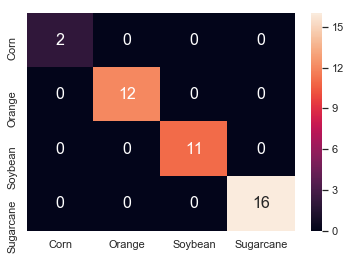

In [20]:
df_cm = pd.DataFrame(matrix, CropLabels,CropLabels)
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.0)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size